#INFO204 Assignment 1
---
*Jackson Kerr | 2942576*

[GitHub Repo](https://github.com/JacksonKerr/LinearRegression)

---



#### Doc Options:

In [1]:
fast = True         # If true, uses stored graph images from GitHub repo for speed
dataFromGit = True  # If true, automatically get the data from github repo

##Gettin That Data:
Let's start by importing the modified boston data.



In [2]:
import pandas as pd
import io
from google.colab import files

bost = pd.DataFrame()
if dataFromGit:
  url = "https://raw.githubusercontent.com/JacksonKerr/LinearRegression/main/modified_boston.csv"
  bost = pd.read_csv(url, index_col=0)
else:
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
  bost = pd.read_csv(io.BytesIO(uploaded['modified_boston.csv']), index_col=0)

# Keep a copy of the original data so we are free to perform EDA
bost_virgin = bost.copy()
bost

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,11.292897
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,15.113707
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,26.034624
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,29.201223
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,24.099477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,12.242679
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,17.066060
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,11.036473
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,13.672169


#### Description:

From [cs.toronto.edu](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

| Variable | Explaination|
|----------|-------------|
| CRIM     | per capita crime rate by town |
| ZN       | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS    | proportion of non-retail business acres per town. |
| CHAS     | Charles River dummy var (1 if tract bounds river; 0 otherwise) |
| NOX      | nitric oxides concentration (parts per 10 million) |
| RM       | average number of rooms per dwelling |
| AGE      | proportion of owner-occupied units built prior to 1940 |
| DIS      | weighted distances to five Boston employment centres |
| RAD      | index of accessibility to radial highways |
| TAX      | full-value property-tax rate per \$10,000 |
| PTRATIO  | pupil-teacher ratio by town |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT    | % lower status of the population |
| MEDV     | Median value of owner-occupied homes in $1000's |

Let's have a look at the fields.

In [3]:
bost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


Looks simple. No missing values. All float64 decimal numbers.

## Exploratory Data Analysis

Let's look at the relationships between the variables using hue="chas" as it's the only categorical variable.

In [4]:
import seaborn as sns
import numpy as np

if fast:
  # Get stored pairplot from GitHub repo
  from IPython.display import Image
  from IPython.core.display import HTML 
  img = Image(url= "https://raw.githubusercontent.com/JacksonKerr/LinearRegression/main/resources/initial_pairplot.png")
else:
  # Create directly
  img = sns.pairplot(bost, hue="chas")
img

### Upon Examination:
- There doesen't seem to be any meaningful grouping going on with the CHAS variable.
- There aren't any strong linear relationships between any of the variables.
- There appears to a non-linear relationship between:
  - RM and MEDV
  - LSTAT and MEDV
  - DIS and NOX
- Age does not seem to be correlated with MEDV

We will analyse these points one at a time.

#### 1. There doesen't seem to be any meaningful grouping going on with the CHAS variable.

This is good, it means this data is likely to work well with a single model. We don't need to 'break up' the problem depending on CHAS.

#### 2. There aren't any strong linear relationships between any of the variables.

Ideally at least one variable would have a strong relationship with the output but such is the way of life.


#### 3. There appears to be a non-linear relationship between:

##### 3a. RM and MEDV
The scatter plot of RM and MEDV shows somewhat of a non-linear relationship between them.
By transforming RM, we can create a new variable which more closely models a linear relationship.
We can now drop RM and use the new variable RM²




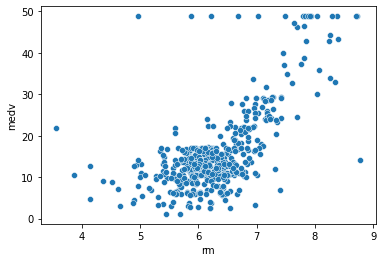

In [5]:
sns.scatterplot(x=bost["rm"], y=bost["medv"])

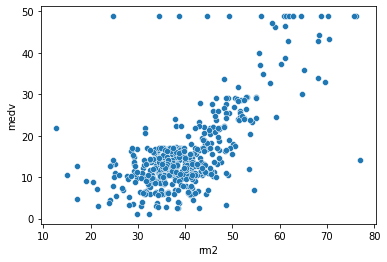

In [6]:
# Remove RM and replace with RM2 = RM²
if "rm" in bost.columns:
  bost.insert(2, "rm2", bost["rm"].copy()**2, True)
  bost = bost.drop(['rm'], axis=1)

sns.scatterplot(x=bost["rm2"], y=bost["medv"])

That looks a lot better.

##### 3b. LSAT and MEDV
Here we can repeat a similar process as for RM and MEDV


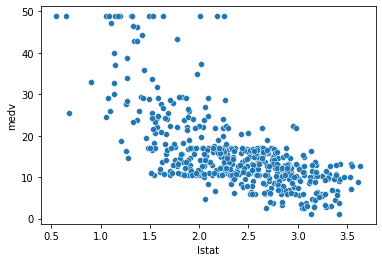

In [7]:
sns.scatterplot(x=np.log(bost["lstat"]), y=bost["medv"])

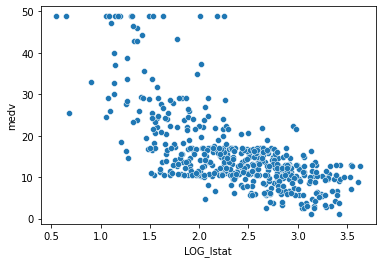

In [8]:
# Remove LSTAT and replace with LOG_LSTAT = ln(LSTAT)
if "lstat" in bost.columns:
  bost.insert(2, "LOG_lstat", np.log(bost["lstat"].copy()), True)
  bost = bost.drop(['lstat'], axis=1)

sns.scatterplot(x=bost["LOG_lstat"], y=bost["medv"])

##### 3c. DIS and NOX
As shown below, DIS and NOX are highly correlated when one of them is correctly scaled.

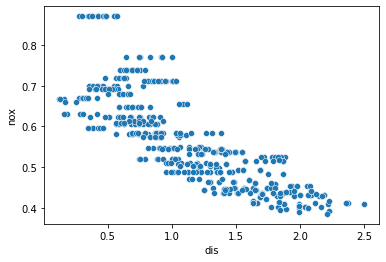

In [9]:
sns.scatterplot(x=np.log(bost["dis"]), y=bost["nox"])

If we examing the meaning of these variables we find:

| Variable | Explaination|
|----------|-------------|
| NOX | nitric oxides concentration (parts per 10 million)   |
| DIS | weighted distances to five Boston employment centres |

It's reasonable to assume that there will be a higher concentration of nitric oxides around employment centers as there is more likely to be chemical production which leads to its emission. [Source: EPA](https://www.epa.gov/ghgemissions/overview-greenhouse-gases#nitrous-oxide)

As these variables are essentially providing the same information, we should remove one of them.



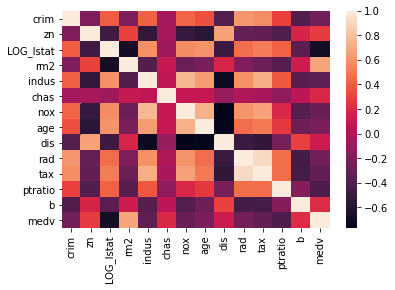

In [10]:
sns.heatmap(bost.corr())

Looking at the heatmap of correlations between the variables, it appears DIS has a stronger correlation with MEDV than NOX does. Therefore we should choose to remove NOX

In [11]:
if "nox" in bost.columns:
  bost = bost.drop(['nox'], axis=1)
bost

,crim,zn,LOG_lstat,rm2,indus,chas,age,dis,rad,tax,ptratio,b,medv
0,0.00632,18.0,1.605430,43.230625,2.31,0.0,65.2,4.0900,1.0,296.0,15.3,396.90,11.292897
1,0.02731,0.0,2.212660,41.229241,7.07,0.0,78.9,4.9671,2.0,242.0,17.8,396.90,15.113707
2,0.02729,0.0,1.393766,51.624225,7.07,0.0,61.1,4.9671,2.0,242.0,17.8,392.83,26.034624
3,0.03237,0.0,1.078410,48.972004,2.18,0.0,45.8,6.0622,3.0,222.0,18.7,394.63,29.201223
4,0.06905,0.0,1.673351,51.079609,2.18,0.0,54.2,6.0622,3.0,222.0,18.7,396.90,24.099477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,2.269028,43.467649,11.93,0.0,69.1,2.4786,1.0,273.0,21.0,391.99,12.242679
502,0.04527,0.0,2.206074,37.454400,11.93,0.0,76.7,2.2875,1.0,273.0,21.0,396.90,17.066060
503,0.06076,0.0,1.729884,48.664576,11.93,0.0,91.0,2.1675,1.0,273.0,21.0,396.90,11.036473
504,0.10959,0.0,1.868721,46.158436,11.93,0.0,89.3,2.3889,1.0,273.0,21.0,393.45,13.672169


#### 4. AGE doesen't seem to be correlated with MEDV.

Looking at the graph below, there seems to be no correlation between AGE and MEDV. This means we are free to remove AGE as it is not a good predictor for the outcome.

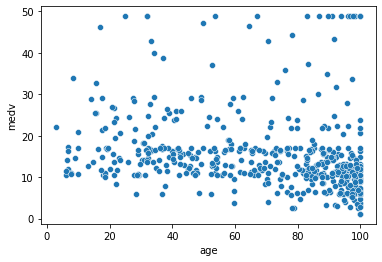

In [12]:
sns.scatterplot(x=bost["age"], y=bost["medv"]) 

In [13]:
# Remove AGE
if "age" in bost.columns:
  bost = bost.drop(['age'], axis=1)

#### Additionally, TAX and RAD seem to be highly correlated

Looking back at the heatmap, we can see that TAX and RAD seem to be highly correlated.

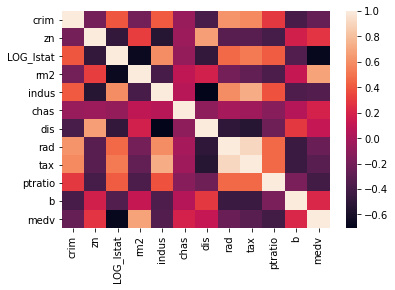

In [14]:
sns.heatmap(bost.corr())

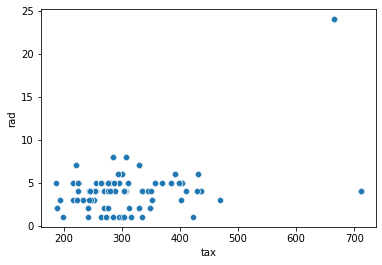

In [15]:
sns.scatterplot(x=bost["tax"], y=bost["rad"]) 

This means we are free to remove one of them. TAX looks like it has a slightly stronger correlation to MEDV as shown in the heatmap. Though it is very close. We will remove RAD in this case.

In [16]:
# Remove RAD
if "rad" in bost.columns:
  bost = bost.drop(['rad'], axis=1)

### Now let's have a look at the data after our EDA

In [17]:
bost.describe()

,crim,zn,LOG_lstat,rm2,indus,chas,dis,tax,ptratio,b,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,2.370965,39.989325,11.136779,0.069170,3.795043,408.237154,18.455534,356.674032,15.606038
std,8.601545,23.322453,0.600891,9.079531,6.860353,0.253994,2.105710,168.537116,2.164946,91.294864,9.480268
min,0.006320,0.000000,0.548121,12.680721,0.460000,0.000000,1.129600,187.000000,12.600000,0.320000,1.134841
25%,0.082045,0.000000,1.938729,34.639111,5.190000,0.000000,2.100175,279.000000,17.400000,375.377500,10.492041
50%,0.256510,0.000000,2.430097,38.545472,9.690000,0.000000,3.207450,330.000000,19.050000,391.440000,13.099290
75%,3.677082,12.500000,2.830563,43.870759,18.100000,0.000000,5.188425,666.000000,20.200000,396.225000,16.967099
max,88.976200,100.000000,3.636796,77.088400,27.740000,1.000000,12.126500,711.000000,22.000000,396.900000,48.819313


Looks good, the seems to make sense after a quick glance.

However, it seems there are some large differences in the standard deviations of our variables. More specificly; TAX, B, and to a lesser extent ZN seem to have deviations much greater than the others. This is likely to cause issues when modeling if not accounted for (Especially when using kNN). We will address this by using a scaler later on.

## Hyperparameter Analysis

### Helper function from lab
```
def cross_validate_model_mse(mdl, param_grid, X, y, cv=None)
```



In [18]:
def cross_validate_model_mse(mdl, param_grid, X, y, cv=None):
    import numpy as np
    import pandas as pd

    from sklearn.metrics import mean_squared_error, make_scorer, r2_score
    from sklearn.model_selection import GridSearchCV
    
    # create a MSE scorer
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    # perform the grid search on the supplied data
    cv = GridSearchCV(mdl, param_grid, scoring=scorer, cv=cv, n_jobs=-1)
    cv.fit(X, y)
    cv_stats = pd.DataFrame(cv.cv_results_).filter(regex='(param_.*)|(split.*_test_score)', axis=1)
    cv_stats = cv_stats.melt(id_vars=cv_stats.columns[cv_stats.columns.str.match('param_.*')], var_name='split', value_name='mse')
    cv_stats.rename(columns=lambda n: n.replace('param_', ''), inplace=True)
    cv_stats['split'] = cv_stats['split'].str.replace('split(\d+)_test_score', '\\1', regex=True).astype(np.int64)
    cv_stats['mse'] = -cv_stats['mse']
    
    return cv, cv_stats

### Tuning:

Using cross validation, we can find some suitable hyperparameters to use for our models.

The code below will find suitable hyperparameters for K Nearest Neighbour and a Classification And Regression Tree.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import RepeatedKFold

from matplotlib import pyplot as plt

rkf = RepeatedKFold(n_splits=10, n_repeats=3) # 3 ROUNDS and 10 FOLDS

target = 'medv'
X = bost.drop(columns=[target]).to_numpy()
y = bost[target].to_numpy()

# DUMMY ========
dummy = DummyRegressor(strategy='mean')
dummyCrossVal, dummy_stats = cross_validate_model_mse(dummy, {}, X, y, cv=rkf)
pd.set_option("display.max_rows", None, "display.max_columns", None)

# kNN ========
knn = Pipeline([ ('scale', StandardScaler()), ('knn', KNeighborsRegressor()) ])
knn_grid = { 'knn__n_neighbors' : [1, 2, 5, 10, 20, 40, 80, 120, 300] }
knncv, knn_stats = cross_validate_model_mse(knn, knn_grid, X, y, cv=rkf)
print("kNN optimal neighbours:\t", knncv.best_params_['knn__n_neighbors'], "with MSE:\t", round(-knncv.best_score_, 3))

# CART ========
CART = DecisionTreeRegressor()
CART_grid = { 'min_samples_split' : [2, 5, 10, 20, 40, 80, 120, 360] }
CARTcv, CART_stats = cross_validate_model_mse(CART, CART_grid, X, y, cv=rkf)
print("CART optimal split:\t", CARTcv.best_params_['min_samples_split'], "with MSE:\t", round(-CARTcv.best_score_, 3))

kNN optimal neighbours:	 10 with MSE:	 32.286
CART optimal split:	 40 with MSE:	 26.822


### Plotting
A simple comparison of the performance of kNN and CART

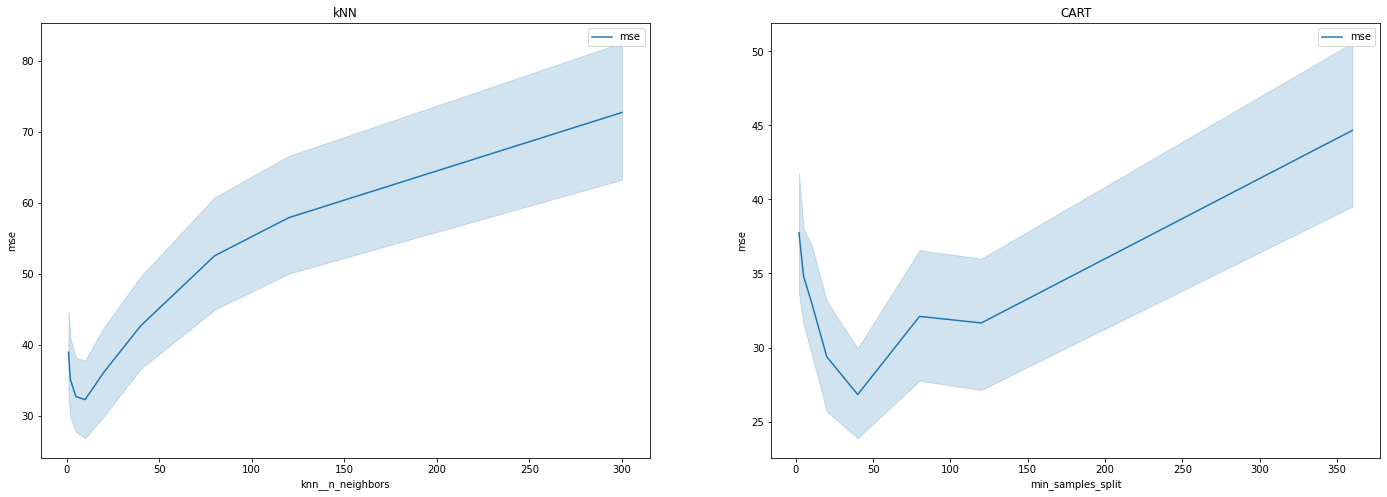

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
#for ax in axs: ax.set_ylim((0, 100))

sns.lineplot(data=knn_stats, x='knn__n_neighbors', y='mse', label='mse', ax=axs[0])
axs[0].set_title('kNN')

sns.lineplot(data=CART_stats, x='min_samples_split', y='mse', label='mse', ax=axs[1])
axs[1].set_title('CART');

# Final Comparison

Data           MSE     r²
-------------  ------  -----
Virgin Linear  39.126  0.63
EDA Linear     32.879  0.689
EDA kNN        56.627  0.465
EDA CART       22.082  0.791
Winning Data   TODO    TODO

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

num_runs = 100
train_size = 0.75

performance = {"virgin_linear":{"mse":0.0, "r2":0.0},
              "eda_linear":{"mse":0.0, "r2":0.0},
              "eda_knn":{"mse":0.0, "r2":0.0},
              "eda_cart":{"mse":0.0, "r2":0.0}}
for i in range(num_runs):
  # Virgin Data
  vX = bost_virgin.drop(columns=[target]).to_numpy()
  vy = bost_virgin[target].to_numpy()
  vX_train, vX_test, vy_train, vy_test = train_test_split(vX, vy, train_size=train_size)

  # EDA Data
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

  # Virgin Linear Regression:
  virgin_model = LinearRegression()
  virgin_model.fit(vX_train, vy_train)

  performance["virgin_linear"]["mse"] += mean_squared_error(vy_test, virgin_model.predict(vX_test))
  performance["virgin_linear"]["r2"]  += r2_score(vy_test, virgin_model.predict(vX_test))

  # EDA Linear Regression:
  eda_lin_model = LinearRegression()
  eda_lin_model.fit(X_train, y_train)

  performance["eda_linear"]["mse"] += mean_squared_error(y_test, eda_lin_model.predict(X_test))
  performance["eda_linear"]["r2"]  += r2_score(y_test, eda_lin_model.predict(X_test))

  # EDA kNN:
  eda_knn_model = KNeighborsRegressor(n_neighbors=knncv.best_params_['knn__n_neighbors'])
  eda_knn_model.fit(X_train, y_train)

  performance["eda_knn"]["mse"] += mean_squared_error(y_test, eda_knn_model.predict(X_test))
  performance["eda_knn"]["r2"]  += r2_score(y_test, eda_knn_model.predict(X_test))

  # EDA CART
  eda_cart_model = DecisionTreeRegressor(min_samples_split=CARTcv.best_params_['min_samples_split'])
  eda_cart_model.fit(X_train, y_train)

  performance["eda_cart"]["mse"] += mean_squared_error(y_test, eda_cart_model.predict(X_test))
  performance["eda_cart"]["r2"]  += r2_score(y_test, eda_cart_model.predict(X_test))

for key in performance.keys():
  performance[key]["mse"] /= num_runs
  performance[key]["r2"] /= num_runs

from tabulate import tabulate
table = [['Virgin Linear', performance["virgin_linear"]["mse"], performance["virgin_linear"]["r2"]],
         ['EDA Linear', performance["eda_linear"]["mse"], performance["eda_linear"]["r2"]],
         ['EDA kNN', performance["eda_knn"]["mse"], performance["eda_knn"]["r2"]],
         ['EDA CART', performance["eda_cart"]["mse"], performance["eda_cart"]["r2"]]]

def round_float_in_table(table):
  for i in range(len(table)):
    cRow = table[i]
    for j in range(len(cRow)):
      if isinstance(table[i][j], float):
        table[i][j] = round(table[i][j], 3)

round_float_in_table(table)
print("Average performance across", num_runs, "runs using random", str(int(train_size*100))+"%", "of data for training in each run")
print(tabulate(table, headers=['Data', 'MSE', "r²"]))


Average performance across 100 runs using random 75% of data for training in each run
Data              MSE     r²
-------------  ------  -----
Virgin Linear  44.668  0.5
EDA Linear     38.103  0.564
EDA kNN        53.841  0.395
EDA CART       32.396  0.624


# TODO
- Compare other models to linear regression
 - use hyperparams found using cross validation
 - use both virgin data and EDA data
 - plot findings in easy to understand graphics
- Knowledge generation
 - generate CART decision tree and use it to learn about the data (see spec)

### Spliting data into training and testing sets
75% training and 25% testing
